# FunOS module init analysis 

In [1]:
# *NOTE*: run this command to clean output cell and meta data.
#nb-clean clean  ./funos_stats_analysis/fun_module_init_analysis.ipynb

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Tuple
import yaml
import json
import os
import logging

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

#https://stackoverflow.com/questions/36288670/how-to-programmatically-generate-markdown-output-in-jupyter-notebooks
from IPython.display import display, Markdown, Latex

In [3]:
try:
    from dpcsh_interactive_client.funos_module_init_time import *

except ImportError:
    from funos_module_init_time import *

## Module and notif init file loading

In [4]:
# A logger for this file
logger = logging.getLogger(__name__)


In [5]:
# load config file
current_path = os.getcwd()
print("current directory is: " + current_path)

# INPUT_FILE_URL = "uartout0.0.txt"
INPUT_FILE_URL = "http://palladium-jobs.fungible.local:8080/job/4297914/raw_file/odp/uartout0.0.txt"

fun_module_notif_init_df = process_module_notif_init_data(
    INPUT_FILE_URL, logger=logger, working_dir=current_path
)

current directory is: /Users/insop/Projects/Fng/FunTools/dpcsh_interactive_client/src/dpcsh_interactive_client
Threshold collapse: 28235879.0
                                          start_time   finish_time  \
module_name                                                          
accel_telem-init                        1.409756e+10  1.409851e+10   
adi-init                                1.413173e+10  1.413179e+10   
all_hsu-init                            1.659658e+10  1.659687e+10   
allvols-init                            1.974909e+10  1.974910e+10   
app-init                                1.424145e+10  1.424146e+10   
...                                              ...           ...   
pci_func_plug-**                        1.669833e+10  1.675480e+10   
system_boot_complete-**                 1.653204e+10  1.658851e+10   
system_commands_ready-**                1.980147e+10  1.985795e+10   
system_pci_early_bootstrap_complete-**  1.413057e+10  1.418704e+10   
system_ready_to_st

## Plot all modules and notif init

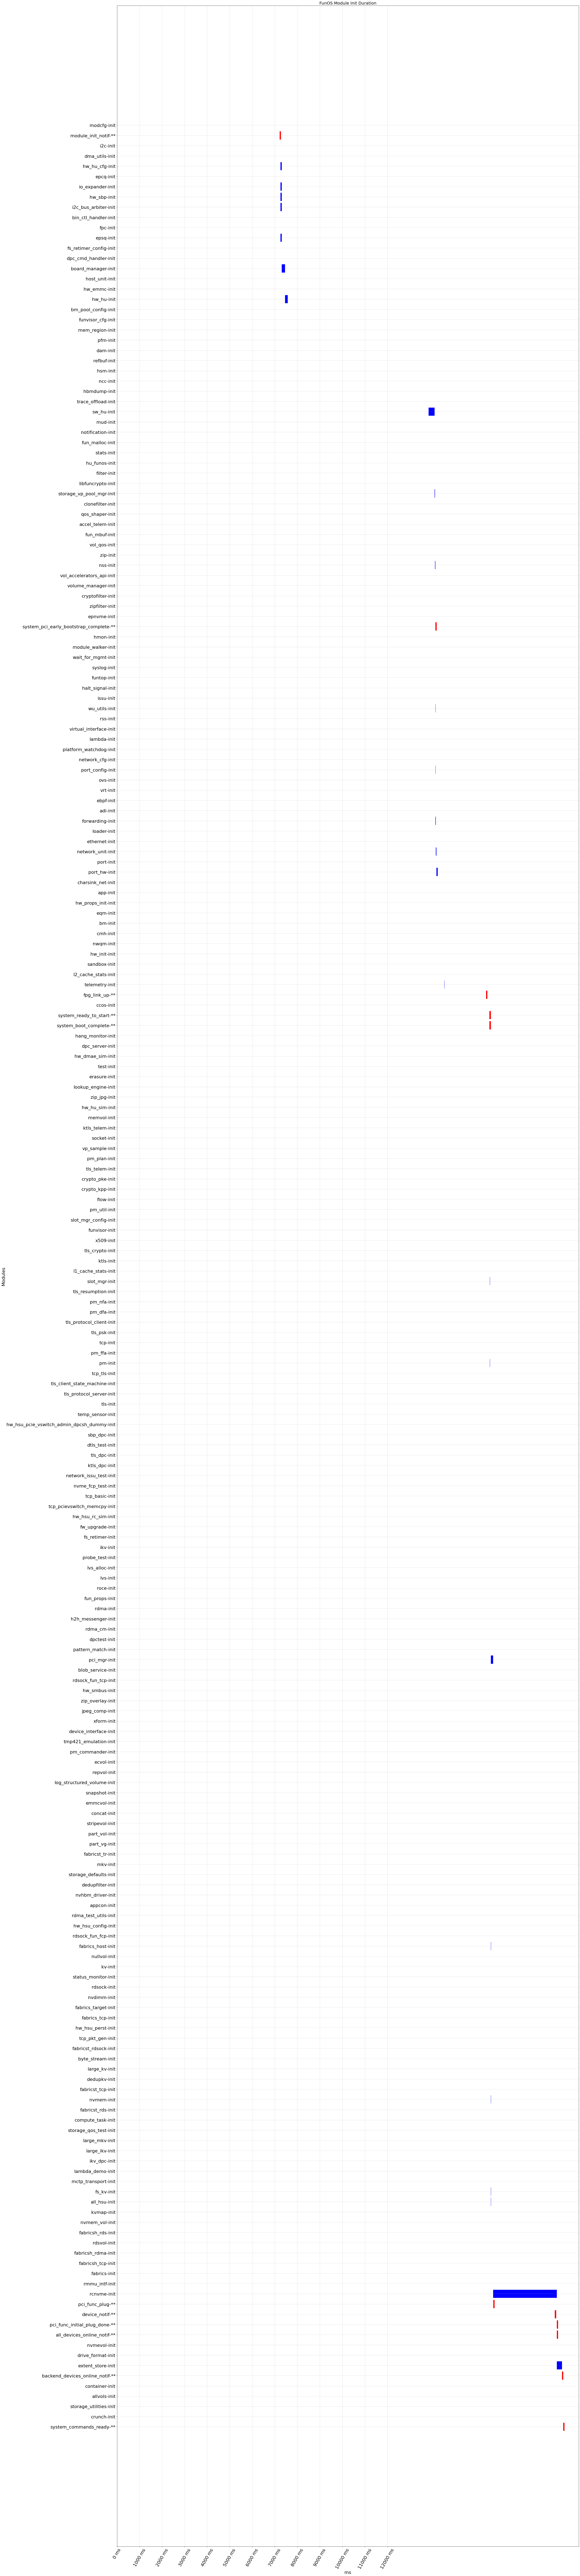

In [6]:
# MAIN CALLS
# plot the events
working_dir = "."
full_module_notif_chart = os.path.join(working_dir, "fun_module_notif_init_chart.png")
plot_module_time_chart(fun_module_notif_init_df, save_file_name=full_module_notif_chart, disp_granualarity_ms=1000, debug=False)

## Collapsed Plot all modules and notif init

# MAIN CALLS
# plot the events
working_dir = "."
full_module_notif_chart = os.path.join(working_dir, "fun_module_notif_init_chart.png")
plot_module_time_chart(fun_module_notif_init_df, save_file_name=full_module_notif_chart, disp_granualarity_ms=1000, debug=False)

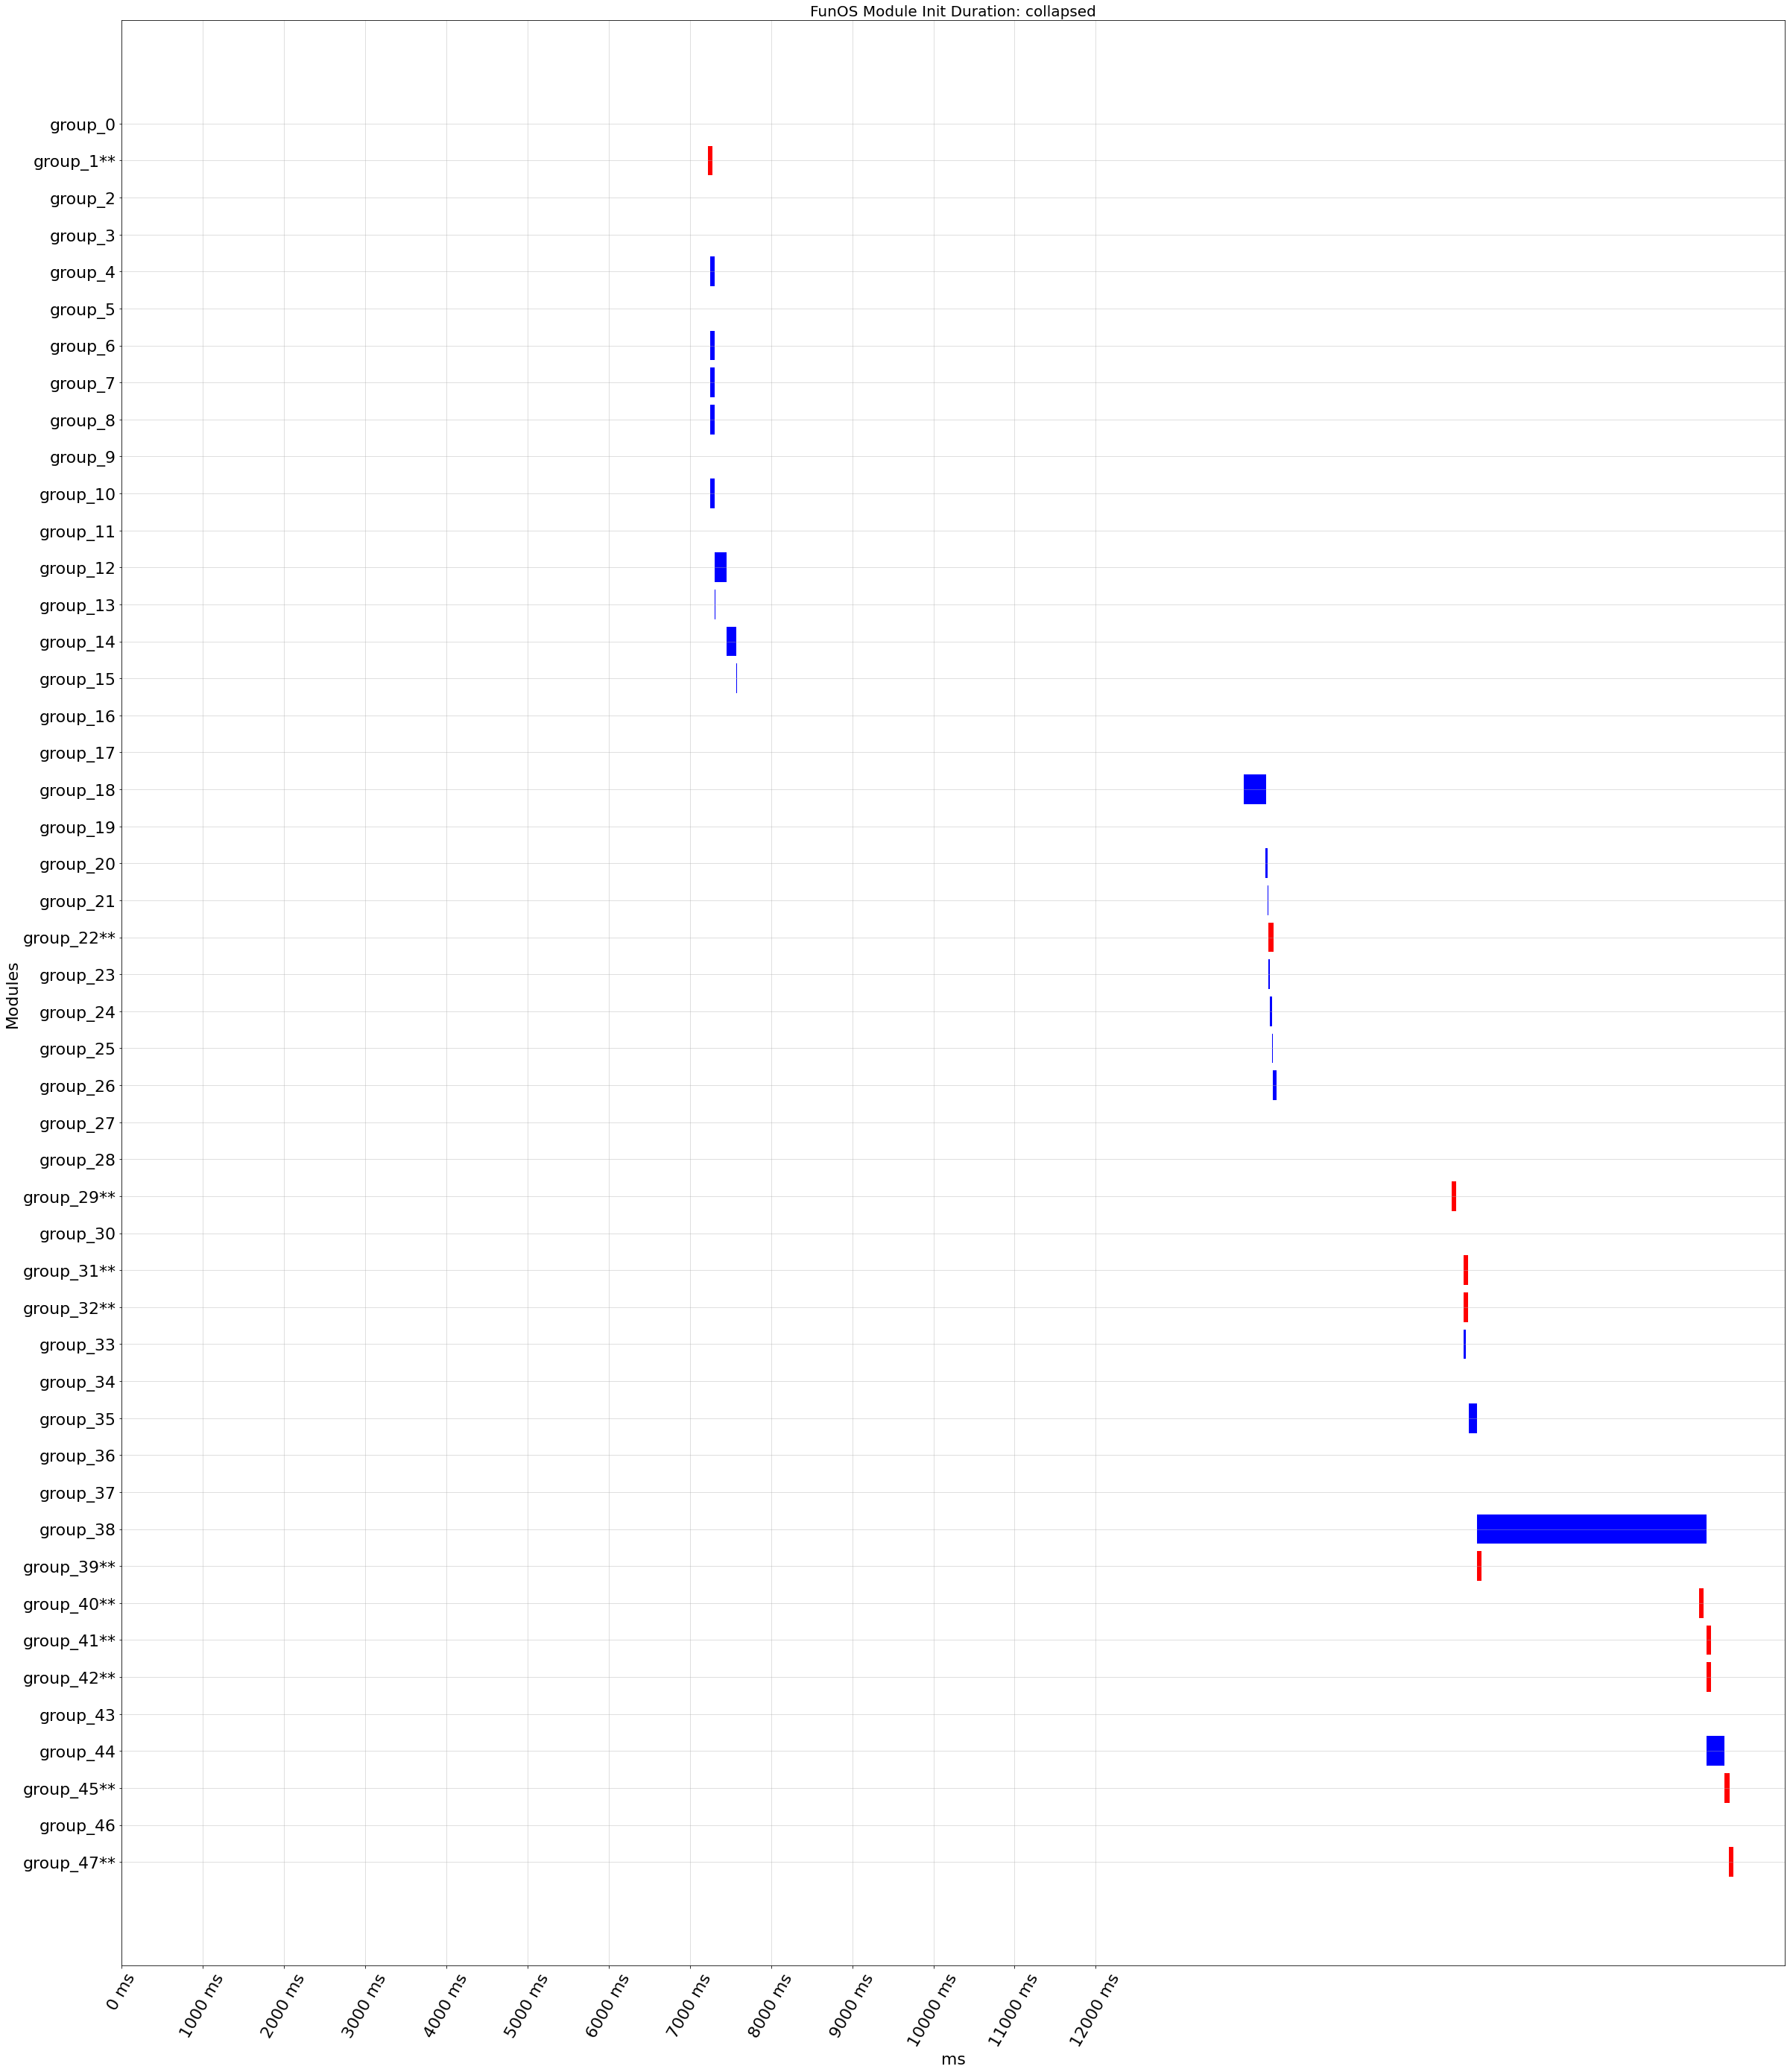

Collapsed module group report (threshold time of 28235879.0 ns):
group_0(1): ['modcfg-init']
group_1**(1): ['module_init_notif-**']
group_2(1): ['i2c-init']
group_3(1): ['dma_utils-init']
group_4(1): ['hw_hu_cfg-init']
group_5(1): ['epcq-init']
group_6(1): ['io_expander-init']
group_7(1): ['hw_sbp-init']
group_8(1): ['i2c_bus_arbiter-init']
group_9(2): ['bin_ctl_handler-init', 'fpc-init']
group_10(1): ['epsq-init']
group_11(2): ['fs_retimer_config-init', 'dpc_cmd_handler-init']
group_12(1): ['board_manager-init']
group_13(2): ['host_unit-init', 'hw_emmc-init']
group_14(1): ['hw_hu-init']
group_15(7): ['bm_pool_config-init', 'funvisor_cfg-init', 'mem_region-init', 'pfm-init', 'dam-init', 'refbuf-init', 'hsm-init']
group_16(2): ['ncc-init', 'hbmdump-init']
group_17(1): ['trace_offload-init']
group_18(1): ['sw_hu-init']
group_19(1): ['mud-init']
group_20(13): ['notification-init', 'fun_malloc-init', 'stats-init', 'hu_funos-init', 'filter-init', 'libfuncrypto-init', 'storage_vp_pool_mgr-in

In [7]:
# MAIN CALLS
# plot the events

threshold_collapse = get_duration_threshold(fun_module_notif_init_df, threshold=0.01)

fun_module_notif_init_df_collapsed, group_table_module_notif = get_collapsed_df(fun_module_notif_init_df, threshold_collapse, debug=False)


working_dir = "."

save_file_name = os.path.join(working_dir, "fun_module_notif_init_df_collapsed.png")
# plot_module_time_chart(fun_module_notif_init_df, save_file_name=full_module_notif_chart, disp_granualarity_ms=1000, debug=False)

plot_module_time_chart(fun_module_notif_init_df_collapsed, disp_granualarity_ms=1000, debug=False, group_table=group_table_module_notif, save_file_name=save_file_name)

print_group_table(group_table_module_notif, threshold=threshold_collapse, save_file_name=save_file_name)